# Vizualisation Stats Dataset

In [8]:
import os
import glob
import random
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [9]:
# --- Configuration ---
# Chemin vers le répertoire contenant les dossiers des types de cellules
data_path = "/home/anthony-sauvage/repo/BloodCellClassification/app/data/raw/bloodcells_dataset"


In [14]:
import os
import json

def map_subdirs_to_files(dir_path):
    """
    Crée un dictionnaire qui mappe directement chaque nom de sous-répertoire
    à la liste de ses fichiers (images).

    Format de sortie :
    {
        "nom_sous_repertoire_1": ["img1.jpg", "img2.jpg"],
        "nom_sous_repertoire_2": ["imgA.jpg", "imgB.jpg"],
        ...
    }

    Args:
        dir_path (str): Le chemin vers le répertoire principal.

    Returns:
        dict: Un dictionnaire où les clés sont les noms des sous-répertoires
              et les valeurs sont les listes de noms de fichiers.
              Retourne un dictionnaire vide si le chemin n'est pas un répertoire valide ou est vide.
    """
    direct_mapping = {}
    if not os.path.isdir(dir_path):
        print(f"Le chemin '{dir_path}' n'est pas un répertoire valide.")
        return direct_mapping

    for item_name in os.listdir(dir_path):
        item_path = os.path.join(dir_path, item_name)
        
        # On s'assure que c'est bien un sous-répertoire
        if os.path.isdir(item_path):
            # Liste uniquement les fichiers dans chaque sous-répertoire
            files_in_subdir = [f for f in os.listdir(item_path) if os.path.isfile(os.path.join(item_path, f))]
            direct_mapping[item_name] = files_in_subdir # Le nom du sous-répertoire est la clé
            
    return direct_mapping


In [11]:
def get_image_path(dataset_map, subdir_name: str, index_img: int):
    list_img = dataset_map[subdir_name]
    img_path = os.path.join(data_path, f"{subdir_name}/{list_img[index_img]}")
    print(img_path)
    return img_path

In [15]:
dataset_map = map_subdirs_to_files(data_path)

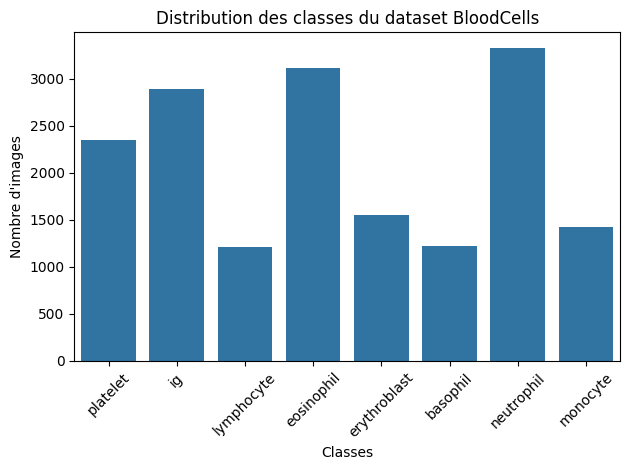

On observe un déséquilibre entre les classes. 
Les classes 'platelet','ig', eosinophil' et 'neutrophil' sont surreprésentées
Il faudra donc réaliser un sous-echantillonnage de ces classes majoritaires


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
def show_class_distribution(dataset_map):
    x = []
    y = []
    for k in dataset_map.keys():
        x.append(k) 
        y.append(len(dataset_map[k]))
    
    sns.barplot(x=x, y=y)
    plt.title("Distribution des classes du dataset BloodCells")
    plt.xticks(rotation=45)  # Incline les étiquettes de 45 degrés
    plt.xlabel("Classes")
    plt.ylabel("Nombre d'images")
    plt.tight_layout()  # Ajuste automatiquement les marges pour éviter que les étiquettes soient coupées
    plt.show()
    
show_class_distribution(dataset_map)
print("On observe un déséquilibre entre les classes. \n\
Les classes 'platelet','ig', eosinophil' et 'neutrophil' sont surreprésentées\n\
Il faudra donc réaliser un sous-echantillonnage de ces classes majoritaires")

In [21]:
import cv2
def get_nan_stats(dataset_map):
    """
    Calcule les statistiques des valeurs manquantes pour chaque type de cellule.
    
    Args:
        dataset_map: Dictionnaire mapping les sous-répertoires aux listes d'images.
        
    Returns:
        Dict[str, Dict[str, float]]: Dictionnaire où les clés sont les types de cellules
                                    et les valeurs sont les statistiques des valeurs manquantes.
    """
    nan_stats = {}
    
    for subdir_name in dataset_map:
        nan_stats[subdir_name] = {}
        
        # Liste des chemins vers les fichiers dans le sous-répertoire
        files_in_subdir = [os.path.join(dataset_map[subdir_name][0], f) 
                          for f in dataset_map[subdir_name]]
        
        # Calcule les statistiques des valeurs manquantes pour chaque fichier
        for file_path in files_in_subdir:
            try:
                img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                if img is None:
                    raise ValueError(f"Impossible de charger l'image '{file_path}'.")
                
                nan_count = np.isnan(img).sum()
                nan_stats[subdir_name][file_path] = nan_count
            except Exception as e:
                print(f"Erreur lors du traitement de l'image '{file_path}': {e}")
                
    return nan_stats

get_nan_stats(dataset_map)

Erreur lors du traitement de l'image 'PLATELET_614174.jpg/PLATELET_614174.jpg': Impossible de charger l'image 'PLATELET_614174.jpg/PLATELET_614174.jpg'.
Erreur lors du traitement de l'image 'PLATELET_614174.jpg/PLATELET_208869.jpg': Impossible de charger l'image 'PLATELET_614174.jpg/PLATELET_208869.jpg'.
Erreur lors du traitement de l'image 'PLATELET_614174.jpg/PLATELET_441264.jpg': Impossible de charger l'image 'PLATELET_614174.jpg/PLATELET_441264.jpg'.
Erreur lors du traitement de l'image 'PLATELET_614174.jpg/PLATELET_200759.jpg': Impossible de charger l'image 'PLATELET_614174.jpg/PLATELET_200759.jpg'.
Erreur lors du traitement de l'image 'PLATELET_614174.jpg/PLATELET_756667.jpg': Impossible de charger l'image 'PLATELET_614174.jpg/PLATELET_756667.jpg'.
Erreur lors du traitement de l'image 'PLATELET_614174.jpg/PLATELET_254469.jpg': Impossible de charger l'image 'PLATELET_614174.jpg/PLATELET_254469.jpg'.
Erreur lors du traitement de l'image 'PLATELET_614174.jpg/PLATELET_119734.jpg': Im

[ WARN:0@0.027] global loadsave.cpp:268 findDecoder imread_('PLATELET_614174.jpg/PLATELET_614174.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.027] global loadsave.cpp:268 findDecoder imread_('PLATELET_614174.jpg/PLATELET_208869.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.027] global loadsave.cpp:268 findDecoder imread_('PLATELET_614174.jpg/PLATELET_441264.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.028] global loadsave.cpp:268 findDecoder imread_('PLATELET_614174.jpg/PLATELET_200759.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.028] global loadsave.cpp:268 findDecoder imread_('PLATELET_614174.jpg/PLATELET_756667.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.028] global loadsave.cpp:268 findDecoder imread_('PLATELET_614174.jpg/PLATELET_254469.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.028] global loadsave.cpp:268 findDecoder imread_('PLATELET_614174.jpg/PLATELE

Erreur lors du traitement de l'image 'MY_210359.jpg/MY_506594.jpg': Impossible de charger l'image 'MY_210359.jpg/MY_506594.jpg'.
Erreur lors du traitement de l'image 'MY_210359.jpg/PMY_582919.jpg': Impossible de charger l'image 'MY_210359.jpg/PMY_582919.jpg'.
Erreur lors du traitement de l'image 'MY_210359.jpg/PMY_902606.jpg': Impossible de charger l'image 'MY_210359.jpg/PMY_902606.jpg'.
Erreur lors du traitement de l'image 'MY_210359.jpg/MY_272861.jpg': Impossible de charger l'image 'MY_210359.jpg/MY_272861.jpg'.
Erreur lors du traitement de l'image 'MY_210359.jpg/MMY_723979.jpg': Impossible de charger l'image 'MY_210359.jpg/MMY_723979.jpg'.
Erreur lors du traitement de l'image 'MY_210359.jpg/MY_342473.jpg': Impossible de charger l'image 'MY_210359.jpg/MY_342473.jpg'.
Erreur lors du traitement de l'image 'MY_210359.jpg/IG_265929.jpg': Impossible de charger l'image 'MY_210359.jpg/IG_265929.jpg'.
Erreur lors du traitement de l'image 'MY_210359.jpg/PMY_195681.jpg': Impossible de charger 

[ WARN:0@0.232] global loadsave.cpp:268 findDecoder imread_('MY_210359.jpg/PMY_582919.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.233] global loadsave.cpp:268 findDecoder imread_('MY_210359.jpg/PMY_902606.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.233] global loadsave.cpp:268 findDecoder imread_('MY_210359.jpg/MY_272861.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.233] global loadsave.cpp:268 findDecoder imread_('MY_210359.jpg/MMY_723979.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.233] global loadsave.cpp:268 findDecoder imread_('MY_210359.jpg/MY_342473.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.233] global loadsave.cpp:268 findDecoder imread_('MY_210359.jpg/IG_265929.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.233] global loadsave.cpp:268 findDecoder imread_('MY_210359.jpg/PMY_195681.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.237] 

Erreur lors du traitement de l'image 'EO_390994.jpg/EO_270748.jpg': Impossible de charger l'image 'EO_390994.jpg/EO_270748.jpg'.
Erreur lors du traitement de l'image 'EO_390994.jpg/EO_680039.jpg': Impossible de charger l'image 'EO_390994.jpg/EO_680039.jpg'.
Erreur lors du traitement de l'image 'EO_390994.jpg/EO_189266.jpg': Impossible de charger l'image 'EO_390994.jpg/EO_189266.jpg'.
Erreur lors du traitement de l'image 'EO_390994.jpg/EO_250964.jpg': Impossible de charger l'image 'EO_390994.jpg/EO_250964.jpg'.
Erreur lors du traitement de l'image 'EO_390994.jpg/EO_735445.jpg': Impossible de charger l'image 'EO_390994.jpg/EO_735445.jpg'.
Erreur lors du traitement de l'image 'EO_390994.jpg/EO_449240.jpg': Impossible de charger l'image 'EO_390994.jpg/EO_449240.jpg'.
Erreur lors du traitement de l'image 'EO_390994.jpg/EO_545808.jpg': Impossible de charger l'image 'EO_390994.jpg/EO_545808.jpg'.
Erreur lors du traitement de l'image 'EO_390994.jpg/EO_648225.jpg': Impossible de charger l'image

[ WARN:0@0.441] global loadsave.cpp:268 findDecoder imread_('EO_390994.jpg/EO_303353.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.441] global loadsave.cpp:268 findDecoder imread_('EO_390994.jpg/EO_749176.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.442] global loadsave.cpp:268 findDecoder imread_('EO_390994.jpg/EO_420876.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.442] global loadsave.cpp:268 findDecoder imread_('EO_390994.jpg/EO_786872.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.442] global loadsave.cpp:268 findDecoder imread_('EO_390994.jpg/EO_245768.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.442] global loadsave.cpp:268 findDecoder imread_('EO_390994.jpg/EO_415104.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.442] global loadsave.cpp:268 findDecoder imread_('EO_390994.jpg/EO_132515.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.442] glob

Erreur lors du traitement de l'image 'SNE_824117.jpg/SNE_113678.jpg': Impossible de charger l'image 'SNE_824117.jpg/SNE_113678.jpg'.
Erreur lors du traitement de l'image 'SNE_824117.jpg/BNE_911025.jpg': Impossible de charger l'image 'SNE_824117.jpg/BNE_911025.jpg'.
Erreur lors du traitement de l'image 'SNE_824117.jpg/SNE_893121.jpg': Impossible de charger l'image 'SNE_824117.jpg/SNE_893121.jpg'.
Erreur lors du traitement de l'image 'SNE_824117.jpg/SNE_313880.jpg': Impossible de charger l'image 'SNE_824117.jpg/SNE_313880.jpg'.
Erreur lors du traitement de l'image 'SNE_824117.jpg/BNE_133048.jpg': Impossible de charger l'image 'SNE_824117.jpg/BNE_133048.jpg'.
Erreur lors du traitement de l'image 'SNE_824117.jpg/SNE_610007.jpg': Impossible de charger l'image 'SNE_824117.jpg/SNE_610007.jpg'.
Erreur lors du traitement de l'image 'SNE_824117.jpg/SNE_848740.jpg': Impossible de charger l'image 'SNE_824117.jpg/SNE_848740.jpg'.
Erreur lors du traitement de l'image 'SNE_824117.jpg/SNE_65413.jpg': 

[ WARN:0@0.649] global loadsave.cpp:268 findDecoder imread_('SNE_824117.jpg/SNE_848740.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.652] global loadsave.cpp:268 findDecoder imread_('SNE_824117.jpg/SNE_65413.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.652] global loadsave.cpp:268 findDecoder imread_('SNE_824117.jpg/SNE_159393.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.652] global loadsave.cpp:268 findDecoder imread_('SNE_824117.jpg/SNE_496455.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.652] global loadsave.cpp:268 findDecoder imread_('SNE_824117.jpg/BNE_956597.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.652] global loadsave.cpp:268 findDecoder imread_('SNE_824117.jpg/BNE_962661.jpg'): can't open/read file: check file path/integrity
[ WARN:0@0.652] global loadsave.cpp:268 findDecoder imread_('SNE_824117.jpg/SNE_415544.jpg'): can't open/read file: check file path/integrity
[ WARN:

{'platelet': {},
 'ig': {},
 'lymphocyte': {},
 'eosinophil': {},
 'erythroblast': {},
 'basophil': {},
 'neutrophil': {},
 'monocyte': {}}